# Individual_Performance_Heatmap_Football_Analysis

### FC Barcelona vs Real Betis – Copa del Rey Quarterfinals (12/01/2011)

This notebook analyses the match between FC Barcelona and Real Betis, which ended 5-0 in favor of Barcelona. Key highlights include a hat-trick by Messi, with goals also from Pedro and Keita.

The notebook includes:

- Data preprocessing of match events
- Visualization of player activity with a heatmap
- Optional visualization of passes or events using arrows
- Adjustments to align event coordinates with the pitch dimensions

This analysis focuses on understanding player influence and event distribution during the match.

Imagine you want to identify the areas of influence of a player based on the locations where they have participated the most. 
Let’s say we take the “action radius” from the previous topic and turn it into something more visible and tangible, so that with a quick glance you can see where the player has been most active.

In this notebook we will analyse Messi in the Game against Betis

###  Csv with passes

In the csv we have only the passes. For this notebook we will use only the 'passes' but you can use more data and get more actions

In [1]:
!pip install mplsoccer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 1.7 MB/s eta 0:00:00


In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read the csv

df = pd.read_csv("/kaggle/input/messi-dataset/messibetis5.csv")
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


## Create the pitch and normalize values
Now we’re going to create the pitch, setting it up with the exact dimensions needed so that it matches the coordinate system used in our CSV dataset.

In [4]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


### Clean and check if we have NaN or infs numbers in our DF

In [5]:
print('Any NaN?',df.isna().any().any()) # False
print(df.isna().sum())
print('Show me all the rows where there is at least one NaN.',df[df.isna().any(axis=1)])
print('any inf number? ',np.isinf(df['x']).any())
print('any inf number? ',np.isinf(df['y']).any())

Any NaN? False
player     0
minute     0
second     0
x          0
y          0
type       0
outcome    0
endX       0
endY       0
dtype: int64
Show me all the rows where there is at least one NaN. Empty DataFrame
Columns: [player, minute, second, x, y, type, outcome, endX, endY]
Index: []
any inf number?  False
any inf number?  False


### Create the pitch and plot

With this command, we adjust the colours and the size of the pitch so that the heatmap displays correctly. 
If you look closely, you can change the colours—for example, by using #22312c. You just need to choose any colour code you like from a site such as htmlcolorcodes.com and replace it there. 
You can also modify the line_color or the facecolor in the same way.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='y'>

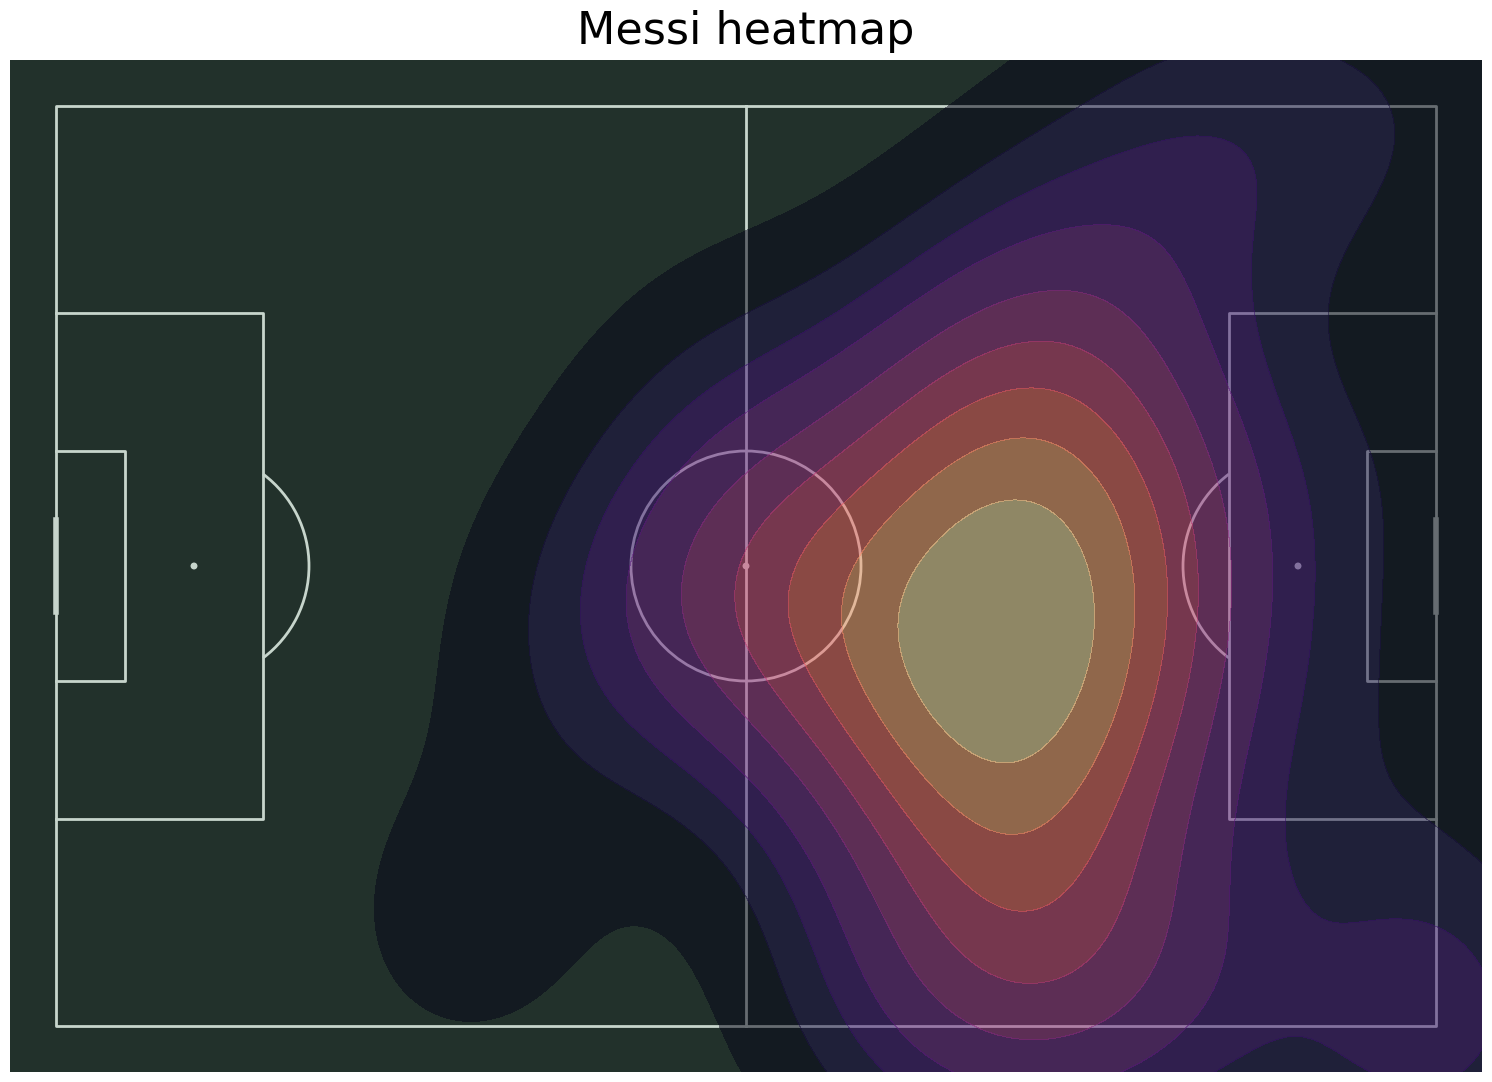

In [6]:
pitch = Pitch(pitch_type='statsbomb', 
              pitch_color='#22312b',
              line_color='#c7d5cc'
             )

fig, ax = pitch.draw(figsize=(18,11),
                    constrained_layout=True,
                    tight_layout=True
                    )

fig.suptitle('Messi heatmap', 
             fontsize=32)

plt.gca().invert_yaxis()

# heatmap
sns.kdeplot(
    x=df['x'],
    y=df['y'],
    fill=True,
    alpha=0.5,
    levels=10,
    cmap='magma',
)

### Heatmap with passes

There’s another way to visualise this heatmap: by showing passes (or whichever data you are analysing) as arrows. 

Lets show the passes using arrows

In [7]:
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Messi Pass Map vs Real Betis')

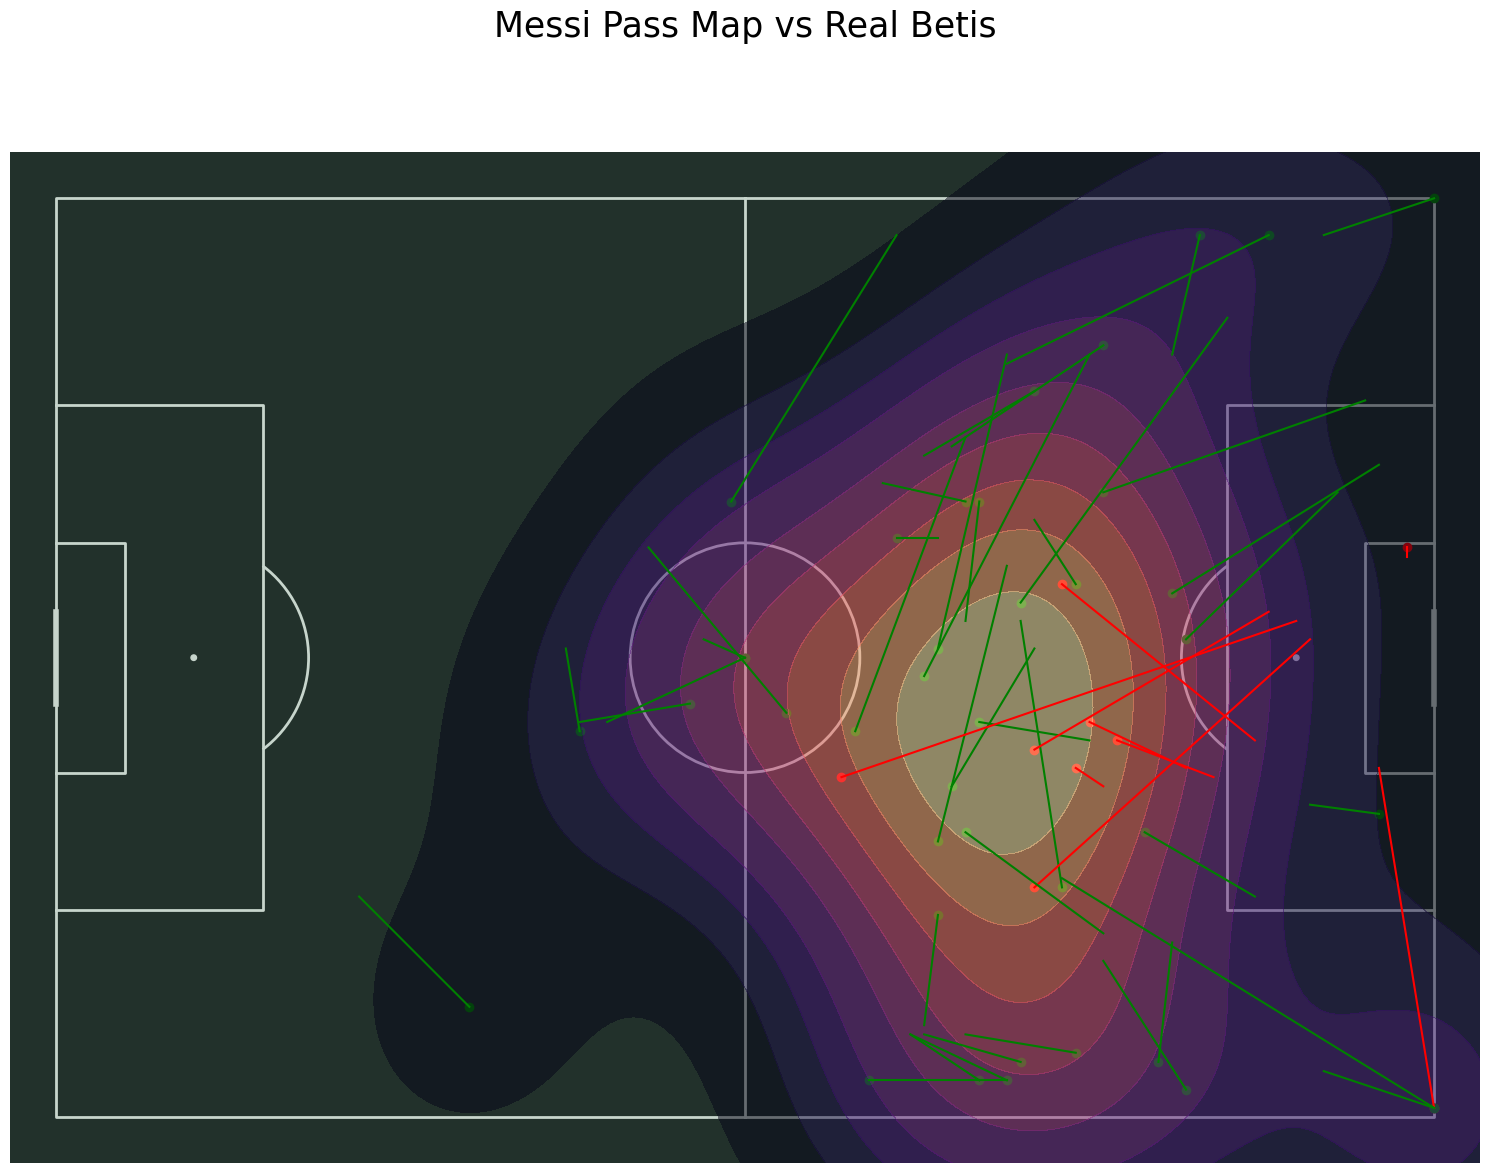

In [8]:
# Create the Pitch
pitch = Pitch(pitch_type='statsbomb', 
              pitch_color='#22312b',
              line_color='#c7d5cc'
             )

fig, ax = pitch.draw(figsize=(15,13),
                    constrained_layout=True,
                    tight_layout=True)

# Creating the passes
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x], df['endX'][x]),
                 (df['y'][x], df['endY'][x]),
                 color='green')
        plt.scatter(df['x'][x], 
                    df['y'][x],
                    color='green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x], df['endX'][x]),
                (df['y'][x], df['endY'][x]),
                color='red')
        plt.scatter(df['x'][x], 
                    df['y'][x],
                    color='red')

# heatmap
sns.kdeplot(
    x=df['x'],
    y=df['y'],
    fill=True,
    alpha=0.5,
    levels=10,
    cmap='magma',
)

plt.gca().invert_yaxis()

plt.suptitle("Messi Pass Map vs Real Betis", fontsize=25)